In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns
import pandas as pd

In [54]:
df = pd.read_csv("../results/2013-2022_approvals_GE_prec_cur.csv")

In [75]:
Expedited_bool = ~df['reviewType'].str.contains('^(S|S,O)$')
Expedited = Expedited_bool.sum()

Serious_bool = df['diseaseClass'] == 'Serious'
Serious = Serious_bool.sum()

hasAnyGE_bool = (df['hasAnyGE'] == True).fillna(False)
hasAnyGE = hasAnyGE_bool.sum()

Expedited_Serious = (Expedited_bool & Serious_bool).sum()
Expedited_hasAnyGE = (Expedited_bool & hasAnyGE_bool).sum()
Serious_hasAnyGE = (Serious_bool & hasAnyGE_bool).sum()

Expedited_Serious_hasAnyGE = (Serious_bool & Expedited_bool & hasAnyGE_bool).sum()

/var/folders/xs/llnz2_gn4fsfwjd4c0prr1w00000gp/T/ipykernel_50467/599128903.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  Expedited_bool = ~df['reviewType'].str.contains('^(S|S,O)$')


In [76]:
a = Expedited
b = Serious
c = hasAnyGE

ab = Expedited_Serious
bc = Serious_hasAnyGE
ca = Expedited_hasAnyGE

abc = Expedited_Serious_hasAnyGE

A = a - ab - ca + abc
B = b - ab - bc + abc
C = c - ca - bc + abc

AB = ab - abc
BC = bc - abc
CA = ca - abc

ABC = abc

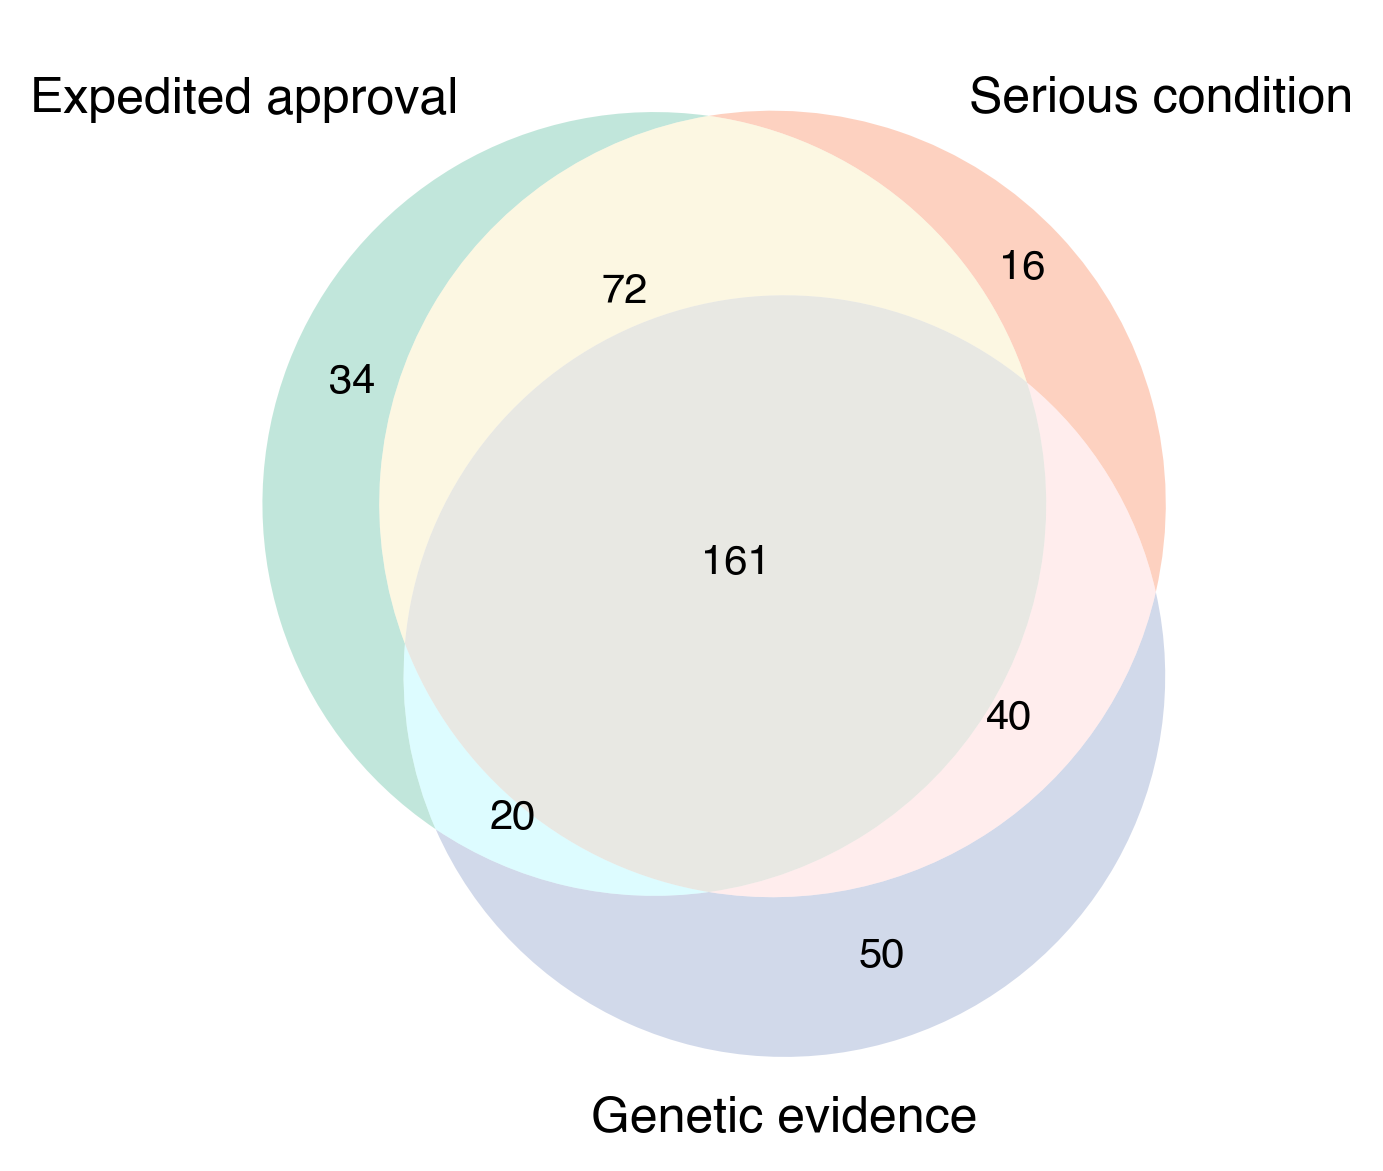

In [78]:
palette = sns.color_palette('Set2') 
plt.rcParams['font.family'] = 'Helvetica'

plt.figure(dpi=300)
prod = (A, B, AB, C, CA, BC, ABC)
venn3(subsets = prod, 
      set_labels = ('Expedited approval', 'Serious condition', 'Genetic evidence'),
      set_colors=palette[:3])
plt.savefig("../results/Venn_plot.png")
plt.show()